In [ ]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
from matplotlib import style
import string
from collections import Counter
import sys
import pickle
import glob
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [ ]:
# Import files from google drive
from google.colab import files
uploaded = files.upload()

Saving Dataset.zip to Dataset.zip


In [ ]:
# Unzip dataset
!unzip Dataset

Archive:  Dataset.zip
  inflating: Dataset/mHealth_subject1.log  
  inflating: Dataset/mHealth_subject10.log  
  inflating: Dataset/mHealth_subject2.log  
  inflating: Dataset/mHealth_subject3.log  
  inflating: Dataset/mHealth_subject4.log  
  inflating: Dataset/mHealth_subject5.log  
  inflating: Dataset/mHealth_subject6.log  
  inflating: Dataset/mHealth_subject7.log  
  inflating: Dataset/mHealth_subject8.log  
  inflating: Dataset/mHealth_subject9.log  


In [ ]:
# Import relevant libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import _pickle as cPickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pickle
import sys
import os

files=os.listdir("Dataset/")
folder="Dataset/"

In [ ]:
features=[]
labels=[]

# loop over all files to get features and labels
with tqdm(total=len(files)) as pbar:
    for f1 in files:
        name=folder+f1
        f = open(name, 'r')
        x=f.readline()
        while(x):
            x=x.split()
            labels.append(int(x[-1]))
            del x[-1]
            sublist=[]
            for val in x:
                sublist.append(val)
            features.append(np.array(sublist))
            x=f.readline()
        pbar.update(1)

# Convert to an array
features=np.array(features)
labels=np.array(labels)

# Print shape of features and labels
print(features.shape)
print(labels.shape)

# Print unique labels
print(np.unique(labels))

# saving for future use
with open("features", 'wb') as fp:
    pickle.dump(features, fp)

with open("labels", 'wb') as fp:
    pickle.dump(labels, fp)

100%|██████████| 10/10 [00:12<00:00,  1.32s/it]


(1215745, 23)
(1215745,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
# getting data
with open('features', 'rb') as fp:
    X=pickle.load(fp)

with open('labels', 'rb') as fp:
    y=pickle.load(fp)

In [ ]:
# encoding labels to one hot form
oh=OneHotEncoder()
y=oh.fit_transform(np.reshape(y,(-1,1)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [ ]:
# Split data in training and testing
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42, shuffle=True)

#X_train=np.expand_dims(X_train,axis=2)
#X_test=np.expand_dims(X_test,axis=2)

In [ ]:
# MLP Network
input = Input(shape=(23,))

# Build layers

# Rectified linear unit
d=Dense(128, activation='relu')(input)
d=Dense(256, activation='relu')(d)

d=Dense(512, activation='relu')(d)
# Reduce overfitting with droput regularisation
d=Dropout(0.4)(d)

d=Dense(1024, activation='relu')(d)

# Reduce overfitting with droput regularisation
d=Dropout(0.4)(d)

# softmax activation function
output = Dense(13, activation='softmax')(d)

# define input and output of model
model = Model(inputs=input, outputs=output)

# learning rate
adam=Adam(lr=0.0001)

# configuring the model for training
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# fit model, define batch size and number of epochs
history=model.fit(X_train,y_train,batch_size=32, epochs=20,validation_data=(X_test,y_test))

# save the model
model.save('mlp.h5')

with open("OH", 'wb') as fp:
    pickle.dump(oh, fp)

# print stats of model
print(history.history.keys())

W0815 11:43:46.672540 139854869505920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 11:43:46.719300 139854869505920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 11:43:46.727280 139854869505920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0815 11:43:46.773563 139854869505920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0815 11:43:46.785584 

Train on 972596 samples, validate on 243149 samples
Epoch 1/20
972596/972596 [==============================] - 266s 274us/step - loss: 0.5807 - acc: 0.7844 - val_loss: 0.4100 - val_acc: 0.8309
Epoch 2/20
972596/972596 [==============================] - 265s 272us/step - loss: 0.4021 - acc: 0.8321 - val_loss: 0.3438 - val_acc: 0.8557
Epoch 3/20
972596/972596 [==============================] - 264s 272us/step - loss: 0.3505 - acc: 0.8518 - val_loss: 0.3161 - val_acc: 0.8672
Epoch 4/20
972596/972596 [==============================] - 265s 272us/step - loss: 0.3211 - acc: 0.8632 - val_loss: 0.2931 - val_acc: 0.8751
Epoch 5/20
972596/972596 [==============================] - 266s 273us/step - loss: 0.3019 - acc: 0.8713 - val_loss: 0.2772 - val_acc: 0.8811
Epoch 6/20
972596/972596 [==============================] - 266s 273us/step - loss: 0.2878 - acc: 0.8772 - val_loss: 0.2642 - val_acc: 0.8874
Epoch 7/20
972596/972596 [==============================] - 264s 271us/step - loss: 0.2767 - acc

In [ ]:
print(model.layers)

[<keras.engine.input_layer.InputLayer object at 0x7f3220731668>, <keras.layers.core.Dense object at 0x7f325c330e10>, <keras.layers.core.Dense object at 0x7f325c330a58>, <keras.layers.core.Dense object at 0x7f325c330be0>, <keras.layers.core.Dropout object at 0x7f32207550f0>, <keras.layers.core.Dense object at 0x7f322bff2da0>, <keras.layers.core.Dropout object at 0x7f322bff2668>, <keras.layers.core.Dense object at 0x7f322c019390>]


In [ ]:
print(model.input)

Tensor("input_1:0", shape=(?, 23), dtype=float32)


In [ ]:
print(model.outputs)

[<tf.Tensor 'dense_5/Softmax:0' shape=(?, 13) dtype=float32>]


In [ ]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 23)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3072      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
__________

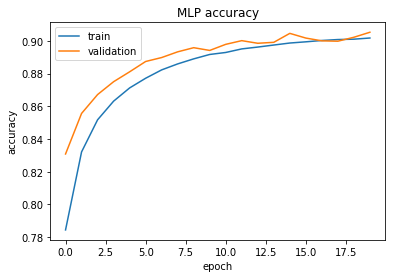

In [ ]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('MLP accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("MLP-acc.png")
#plt.close()

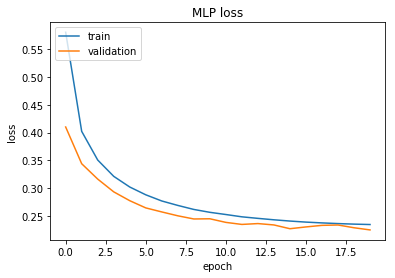

In [ ]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("MLP-loss.png")

with open("X_test-MLP", 'wb') as fp:
    pickle.dump(X_test, fp)

with open("y_test_MLP", 'wb') as fp:
    pickle.dump(y_test, fp)

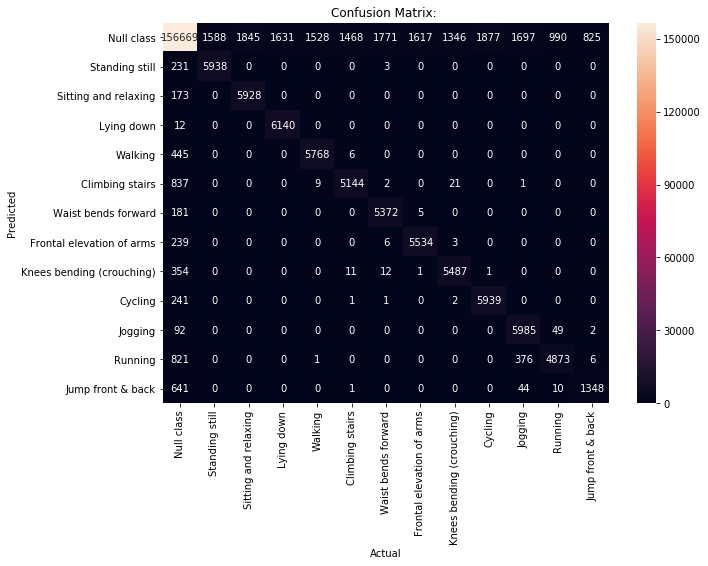

In [ ]:
import pickle
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import confusion_matrix


# getting data
with open('X_test-MLP', 'rb') as fp:
    X_test=pickle.load(fp)

with open('y_test_MLP', 'rb') as fp:
    y_test=pickle.load(fp)


# load model whose conf matrix you want
model=load_model('mlp.h5')

# make predictions
y_pred=model.predict(X_test)

# name labels
labs = ["Null class","Standing still", "Sitting and relaxing","Lying down", "Walking","Climbing stairs", "Waist bends forward","Frontal elevation of arms", "Knees bending (crouching)","Cycling", "Jogging","Running", "Jump front & back"]

preds=[]
new_test=[]

# converting one hot prediction and real label to single integer value
for i,p in enumerate(y_pred):
    preds.append(np.argmax(p))
    new_test.append(np.argmax(y_test[i]))

y_pred=preds
y_test=new_test

# making conf matrix
array=confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(array, index = [i for i in list(labs)],
                  columns = [i for i in list(labs)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt='g')

# saving matrix
plt.title("Confusion Matrix: ")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("CM-mlp.png")

In [ ]:
from sklearn.metrics import classification_report

classes = ["Null class", "Standing still", "Sitting and relaxing","Lying down", "Walking","Climbing stairs", "Waist bends forward","Frontal elevation of arms", "Knees bending (crouching)","Cycling", "Jogging","Running", "Jump front & back"]

print(classification_report(y_test, y_pred, target_names=classes))

                           precision    recall  f1-score   support

               Null class       0.97      0.90      0.93    174852
           Standing still       0.79      0.96      0.87      6172
     Sitting and relaxing       0.76      0.97      0.85      6101
               Lying down       0.79      1.00      0.88      6152
                  Walking       0.79      0.93      0.85      6219
          Climbing stairs       0.78      0.86      0.81      6014
      Waist bends forward       0.75      0.97      0.84      5558
Frontal elevation of arms       0.77      0.96      0.86      5782
Knees bending (crouching)       0.80      0.94      0.86      5866
                  Cycling       0.76      0.96      0.85      6184
                  Jogging       0.74      0.98      0.84      6128
                  Running       0.82      0.80      0.81      6077
        Jump front & back       0.62      0.66      0.64      2044

                 accuracy                           0.91    

In [ ]:
# Results: Precision, Recall, f1 score, Accuracy

from sklearn import metrics
from numpy import argmax
from sklearn.metrics import accuracy_score

print("MLP - Accuracy:{}%".format(100*accuracy_score(y_test, y_pred)))

print("")
print("MLP - Precision: {}%".format(100*metrics.precision_score(y_test, y_pred, average="weighted")))
print("MLP - Recall: {}%".format(100*metrics.recall_score(y_test, y_pred, average="weighted")))
print("MLP - f1_score: {}%".format(100*metrics.f1_score(y_test, y_pred, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

MLP - Accuracy:90.53090903108793%

MLP - Precision: 91.71019874934807%
MLP - Recall: 90.53090903108793%
MLP - f1_score: 90.7625871656464%

Confusion Matrix:
[[156669   1588   1845   1631   1528   1468   1771   1617   1346   1877
    1697    990    825]
 [   231   5938      0      0      0      0      3      0      0      0
       0      0      0]
 [   173      0   5928      0      0      0      0      0      0      0
       0      0      0]
 [    12      0      0   6140      0      0      0      0      0      0
       0      0      0]
 [   445      0      0      0   5768      6      0      0      0      0
       0      0      0]
 [   837      0      0      0      9   5144      2      0     21      0
       1      0      0]
 [   181      0      0      0      0      0   5372      5      0      0
       0      0      0]
 [   239      0      0      0      0      0      6   5534      3      0
       0      0      0]
 [   354      0      0      0      0     11     12      1   5487      1
   

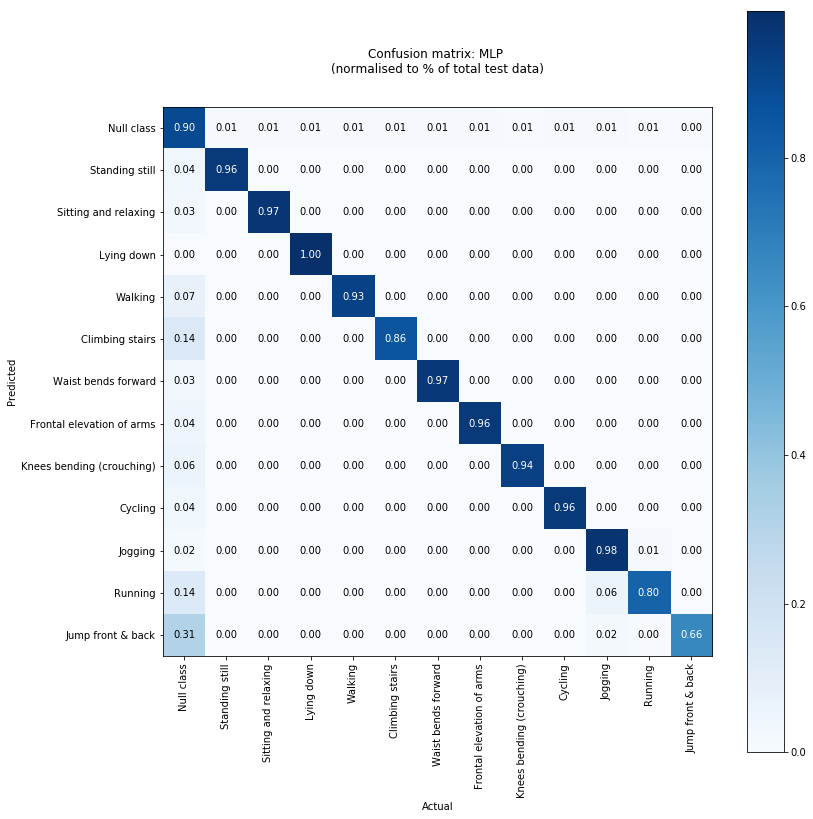

In [ ]:
# Confusion matrix code, referenced in thesis
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

# Import libraries
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Convert cm to array for multiclass cm
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100
multiclass = normalised_confusion_matrix

# labels (classes)
classes = ["Null class", "Standing still", "Sitting and relaxing","Lying down", "Walking","Climbing stairs", "Waist bends forward","Frontal elevation of arms", "Knees bending (crouching)","Cycling", "Jogging","Running", "Jump front & back"]

# plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                               figsize = (12,12))

# plot title, xaxis and yaxis, identify tickmarks, ensure tight layout
plt.title('Confusion matrix: MLP \n(normalised to % of total test data)')
plt.xlabel("Actual")
plt.ylabel("Predicted")
tick_marks = np.arange(13)
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
plt.tight_layout()
plt.show()

In [ ]:
# Bar chart feature importance

from sklearn.metrics import confusion_matrix as cm
import pandas as pd

# confusion matrix
confusion_matrix=cm(y_test, y_pred)

# Create list containing labels for dataframe below
list1 = ["Null class","Standing still", "Sitting and relaxing","Lying down", "Walking","Climbing stairs", "Waist bends forward","Frontal elevation of arms", "Knees bending (crouching)","Cycling", "Jogging","Running", "Jump front & back"]
list2 = ["Null class","Standing still", "Sitting and relaxing","Lying down", "Walking","Climbing stairs", "Waist bends forward","Frontal elevation of arms", "Knees bending (crouching)","Cycling", "Jogging","Running", "Jump front & back"]

# convert to pandas dataframe
pd.DataFrame(confusion_matrix, list1,list2)

df = pd.DataFrame(confusion_matrix, list1,list2)
# Hard code in accuracy
df['Accuracy'] = ['90%','98%','97%','99%','93%','86%','94%','96%','95%','98%','97%','87%','39%']
df = df[1:14]
df

,Null class,Standing still,Sitting and relaxing,Lying down,Walking,Climbing stairs,Waist bends forward,Frontal elevation of arms,Knees bending (crouching),Cycling,Jogging,Running,Jump front & back,Accuracy
Standing still,231,5938,0,0,0,0,3,0,0,0,0,0,0,98%
Sitting and relaxing,173,0,5928,0,0,0,0,0,0,0,0,0,0,97%
Lying down,12,0,0,6140,0,0,0,0,0,0,0,0,0,99%
Walking,445,0,0,0,5768,6,0,0,0,0,0,0,0,93%
Climbing stairs,837,0,0,0,9,5144,2,0,21,0,1,0,0,86%
Waist bends forward,181,0,0,0,0,0,5372,5,0,0,0,0,0,94%
Frontal elevation of arms,239,0,0,0,0,0,6,5534,3,0,0,0,0,96%
Knees bending (crouching),354,0,0,0,0,11,12,1,5487,1,0,0,0,95%
Cycling,241,0,0,0,0,1,1,0,2,5939,0,0,0,98%
Jogging,92,0,0,0,0,0,0,0,0,0,5985,49,2,97%


In [ ]:
# The following feature importance code is taken from this link. 
# Referenced in thesis
# https://www.oipapio.com/question-3935333

# import libraries
from xgboost import plot_importance,XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# import libraries
import numpy as np 
from xgboost import XGBClassifier 

# Set number of estimators
xgb = XGBClassifier(n_estimators=100) 

# feature importance train test split
X_train,X_test,y_train,y_test=model_selection.train_test_split(features,labels,test_size=0.2)

# fit the model, set evaluation set and early stopping rounds
xgb = xgb.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)])


[0]	validation_0-merror:0.253524
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.253252
[2]	validation_0-merror:0.252512
[3]	validation_0-merror:0.251644
[4]	validation_0-merror:0.25164
[5]	validation_0-merror:0.251237
[6]	validation_0-merror:0.251146
[7]	validation_0-merror:0.251142
[8]	validation_0-merror:0.250472
[9]	validation_0-merror:0.250324
[10]	validation_0-merror:0.250246
[11]	validation_0-merror:0.249711
[12]	validation_0-merror:0.249345
[13]	validation_0-merror:0.249144
[14]	validation_0-merror:0.247651
[15]	validation_0-merror:0.245422
[16]	validation_0-merror:0.244689
[17]	validation_0-merror:0.241227
[18]	validation_0-merror:0.240207
[19]	validation_0-merror:0.239643
[20]	validation_0-merror:0.239022
[21]	validation_0-merror:0.238549
[22]	validation_0-merror:0.236604
[23]	validation_0-merror:0.23611
[24]	validation_0-merror:0.235662
[25]	validation_0-merror:0.235226
[26]	validation_0-merror:0.234564
[27]	validation_0-merror:0.2

    feature  importance
3       f8         785
4      f18         715
5      f15         694
1      f17         618
10      f2         578
8      f19         562
9      f11         522
2      f14         467
0       f0         461
6      f10         440
7       f7         428
13      f9         386
16     f16         362
15     f22         338
12     f20         268
17      f6         246
21     f13         224
19     f12         192
14      f1         166
11      f5         151
18     f21         148
20      f4         111
22      f3          45


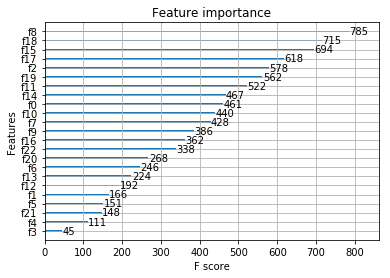

In [ ]:
# import library
import pandas as pd

# fit model
xgb_model=xgb.fit(X_train,y_train)

# convert to pandas dataframe. assign 'feature' and 'importance columns'
xgb_fea_imp=pd.DataFrame(list(xgb_model.get_booster().get_fscore().items()),
                                           
columns=['feature','importance']).sort_values('importance', ascending=False)

# print feature importance for each attribute
print('',xgb_fea_imp)

# plot importance
from xgboost import plot_importance
plot_importance(xgb_model, )